<a href="https://colab.research.google.com/github/JordanDSIA/2025_UTEC_PROGRAMACION_101/blob/main/An%C3%A1lisis%20Exploratorio%20de%20Datos%20sobre%20Fuga%20de%20Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Descargando el dataset de Kaggle ---
Dataset cargado exitosamente desde: /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv

--- Vista previa de los datos después del preprocesamiento ---
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic        

/tmp/ipython-input-12-3557901093.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=churn_palette)


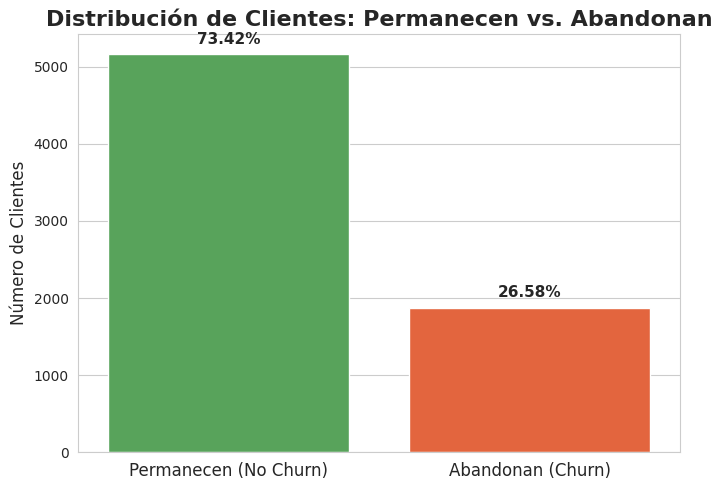


--- Análisis de Fuga por Variables Categóricas Clave ---


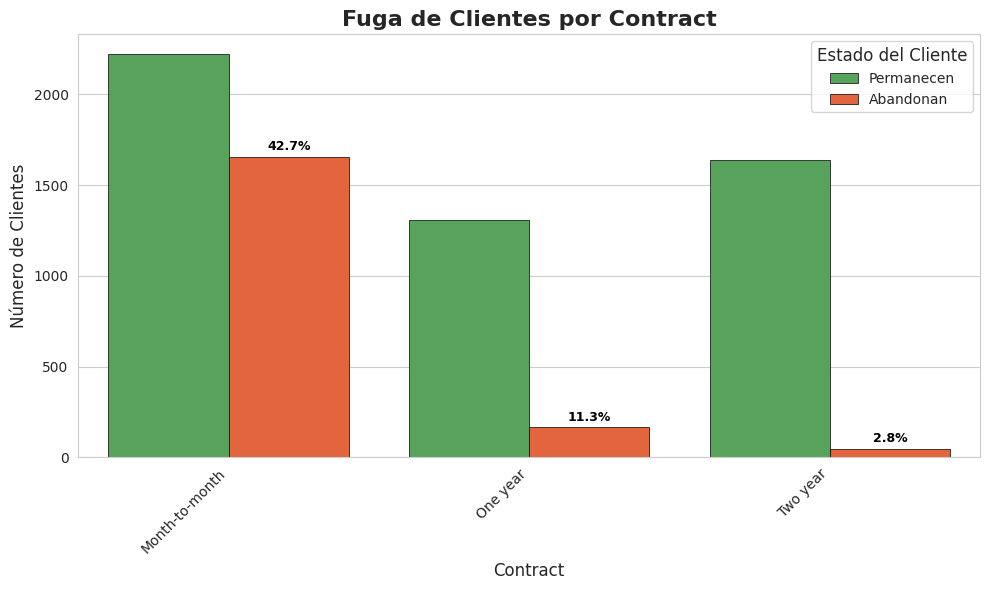


--- Tasa de Fuga (%) por 'Contract' ---
Contract
Month-to-month    42.7
One year          11.3
Two year           2.8
Name: Churn, dtype: float64
----------------------------------------


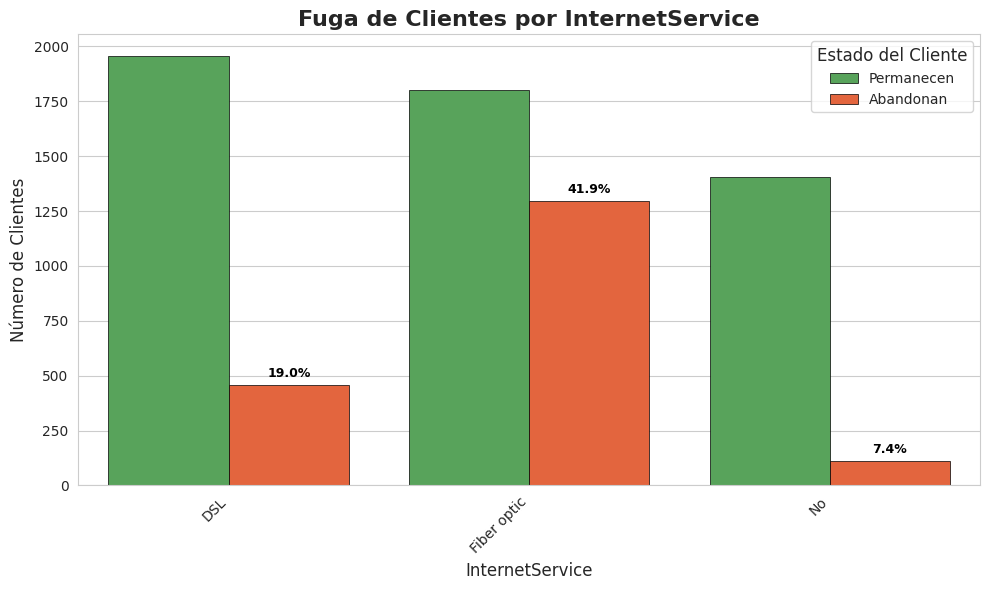


--- Tasa de Fuga (%) por 'InternetService' ---
InternetService
Fiber optic    41.9
DSL            19.0
No              7.4
Name: Churn, dtype: float64
----------------------------------------


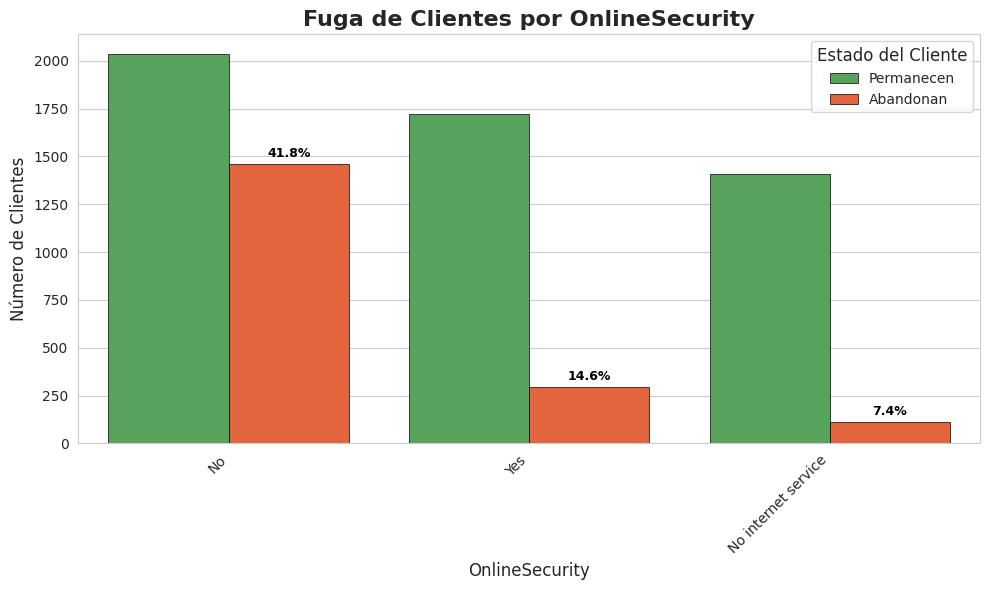


--- Tasa de Fuga (%) por 'OnlineSecurity' ---
OnlineSecurity
No                     41.8
Yes                    14.6
No internet service     7.4
Name: Churn, dtype: float64
----------------------------------------


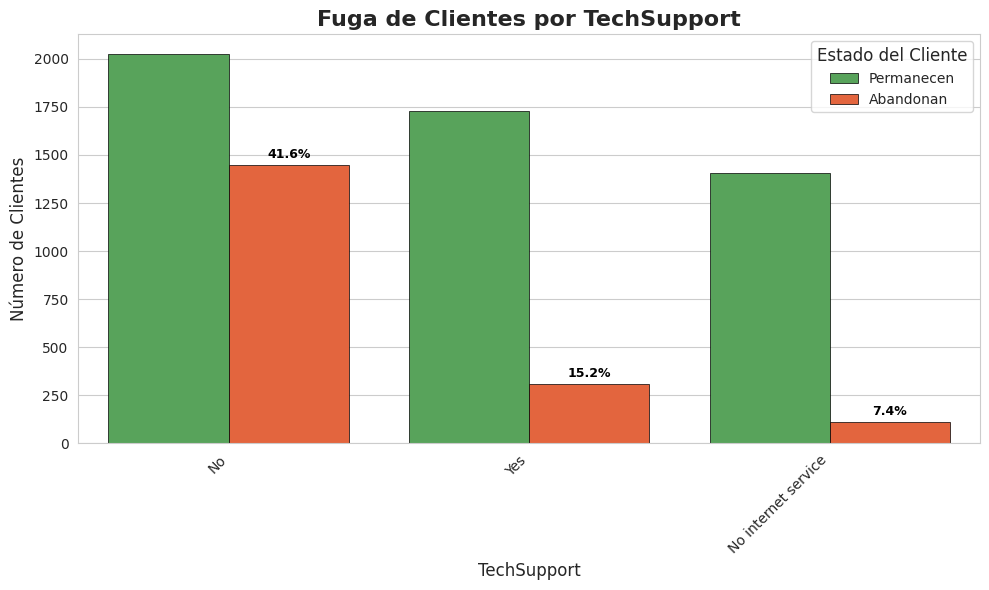


--- Tasa de Fuga (%) por 'TechSupport' ---
TechSupport
No                     41.6
Yes                    15.2
No internet service     7.4
Name: Churn, dtype: float64
----------------------------------------


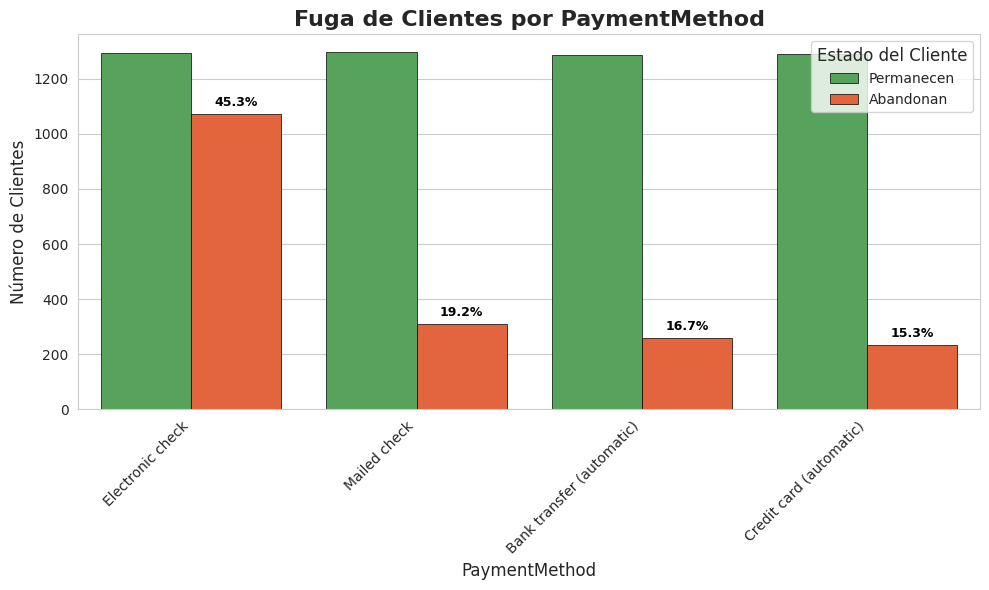


--- Tasa de Fuga (%) por 'PaymentMethod' ---
PaymentMethod
Electronic check             45.3
Mailed check                 19.2
Bank transfer (automatic)    16.7
Credit card (automatic)      15.3
Name: Churn, dtype: float64
----------------------------------------


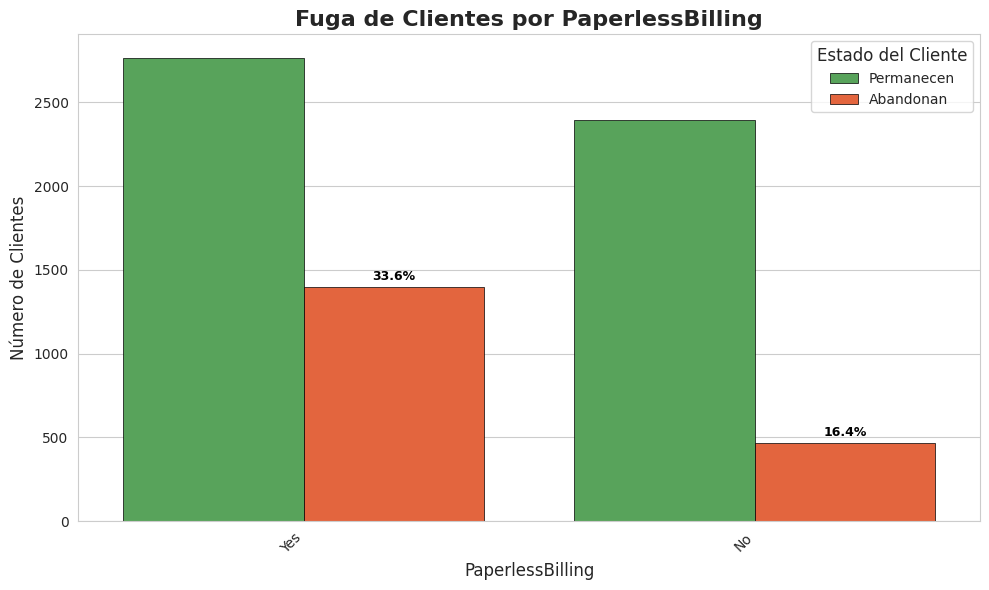


--- Tasa de Fuga (%) por 'PaperlessBilling' ---
PaperlessBilling
Yes    33.6
No     16.4
Name: Churn, dtype: float64
----------------------------------------


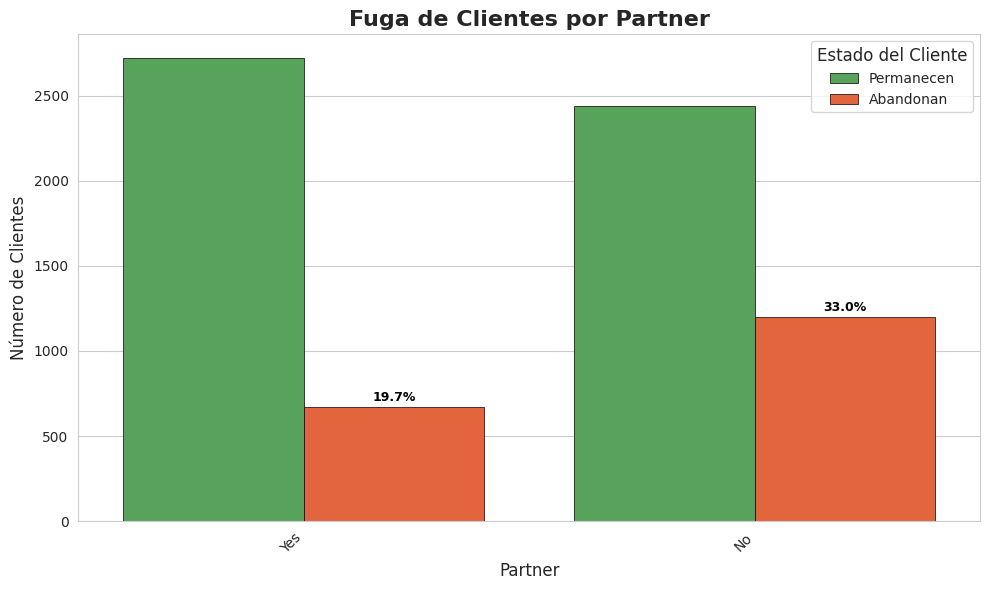


--- Tasa de Fuga (%) por 'Partner' ---
Partner
No     33.0
Yes    19.7
Name: Churn, dtype: float64
----------------------------------------


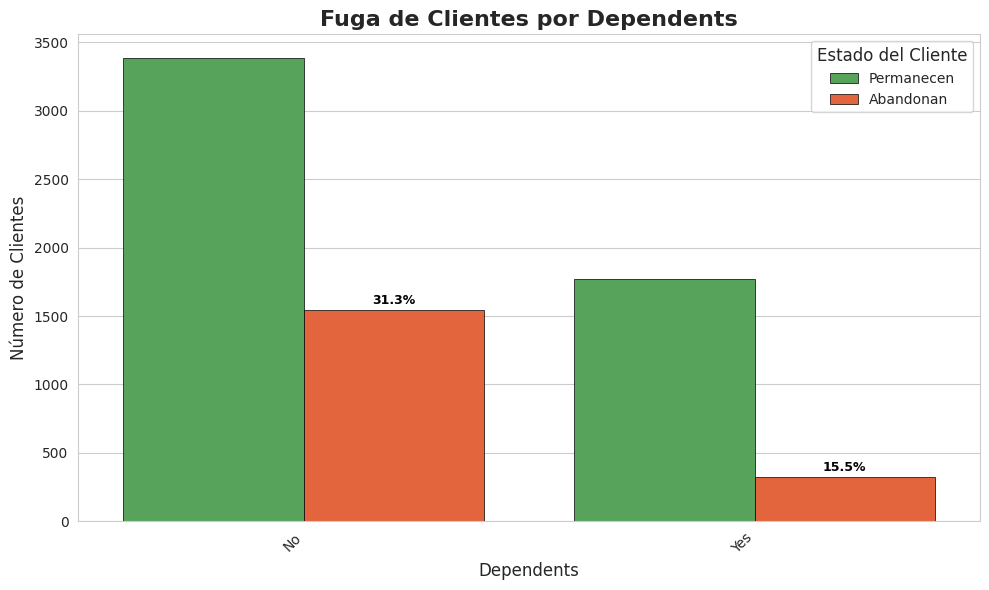


--- Tasa de Fuga (%) por 'Dependents' ---
Dependents
No     31.3
Yes    15.5
Name: Churn, dtype: float64
----------------------------------------

--- Análisis de Fuga por Variables Numéricas Clave ---


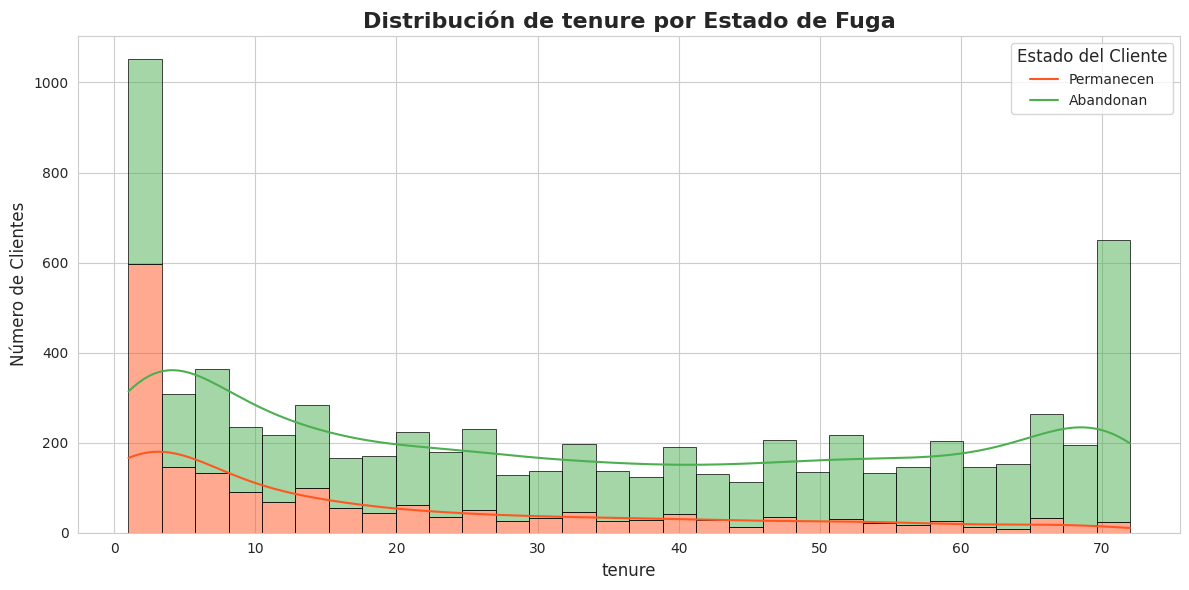

/tmp/ipython-input-12-3557901093.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=churn_palette, linewidth=1.5, medianprops={'color': 'red', 'linewidth': 2})


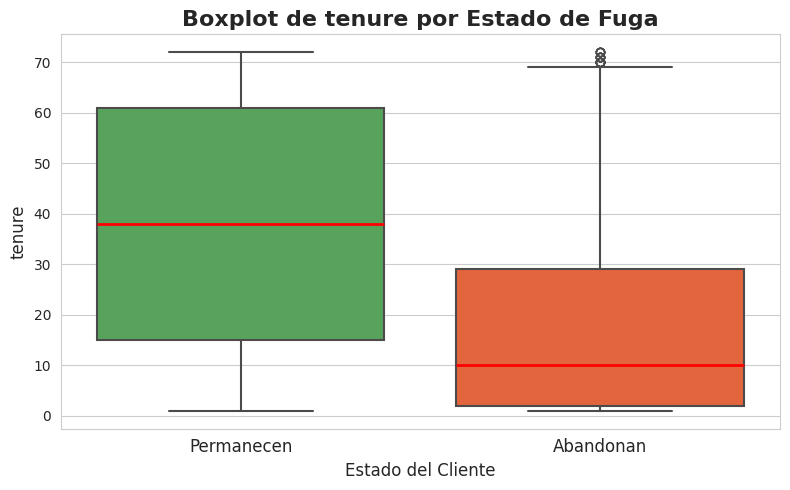


--- Media de 'tenure' ---
Clientes que Abandonan (Churn): 17.98
Clientes que Permanecen (No Churn): 37.65
----------------------------------------


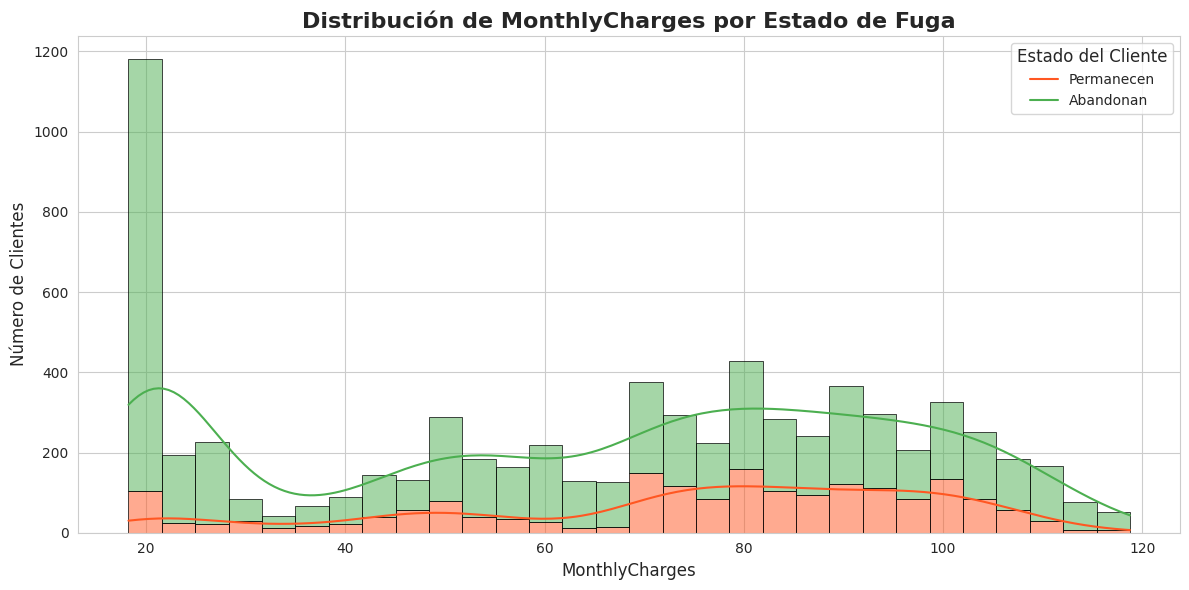

/tmp/ipython-input-12-3557901093.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=churn_palette, linewidth=1.5, medianprops={'color': 'red', 'linewidth': 2})


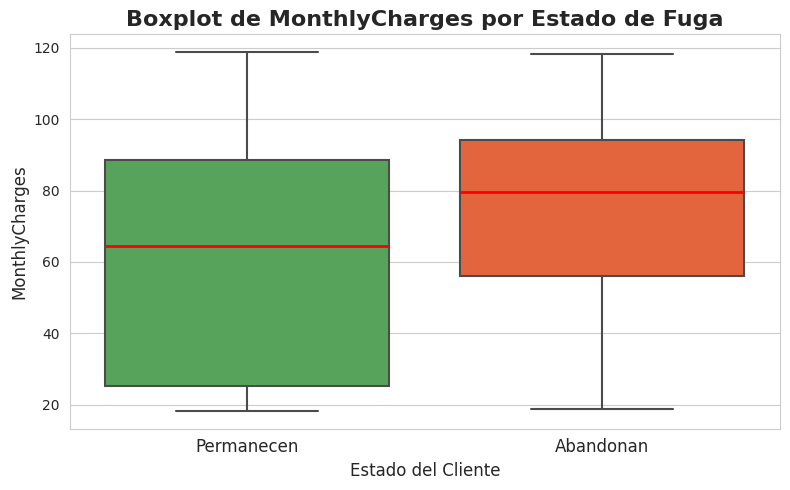


--- Media de 'MonthlyCharges' ---
Clientes que Abandonan (Churn): 74.44
Clientes que Permanecen (No Churn): 61.31
----------------------------------------


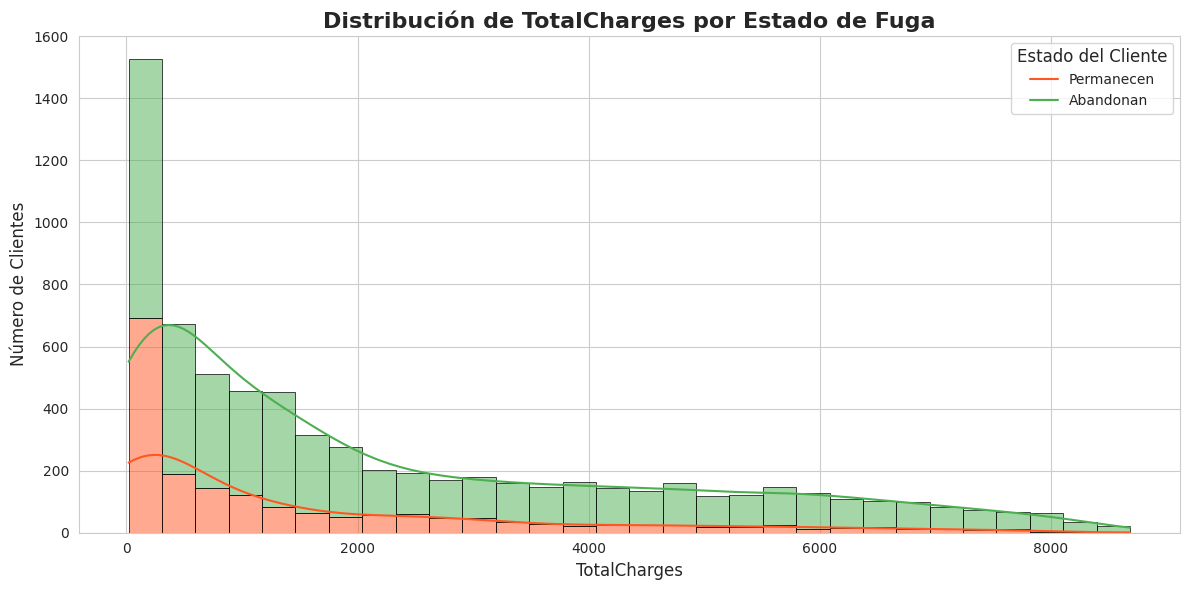

/tmp/ipython-input-12-3557901093.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=churn_palette, linewidth=1.5, medianprops={'color': 'red', 'linewidth': 2})


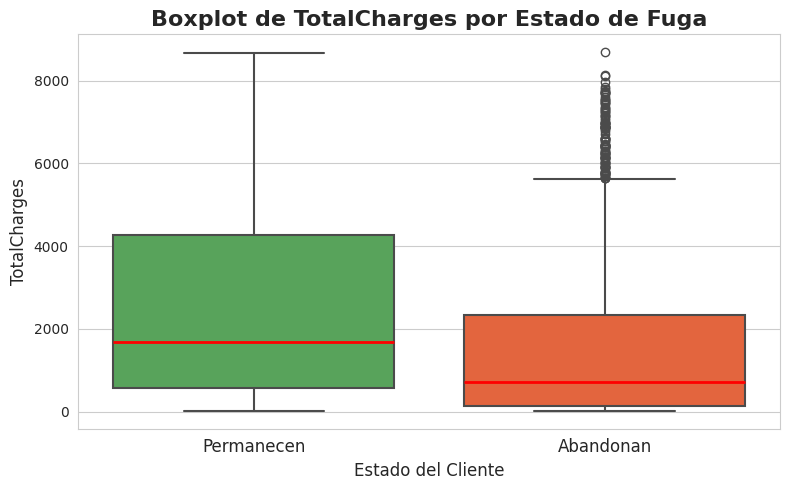


--- Media de 'TotalCharges' ---
Clientes que Abandonan (Churn): 1531.8
Clientes que Permanecen (No Churn): 2555.34
----------------------------------------

--- Matriz de Correlación de Variables Numéricas y Fuga ---


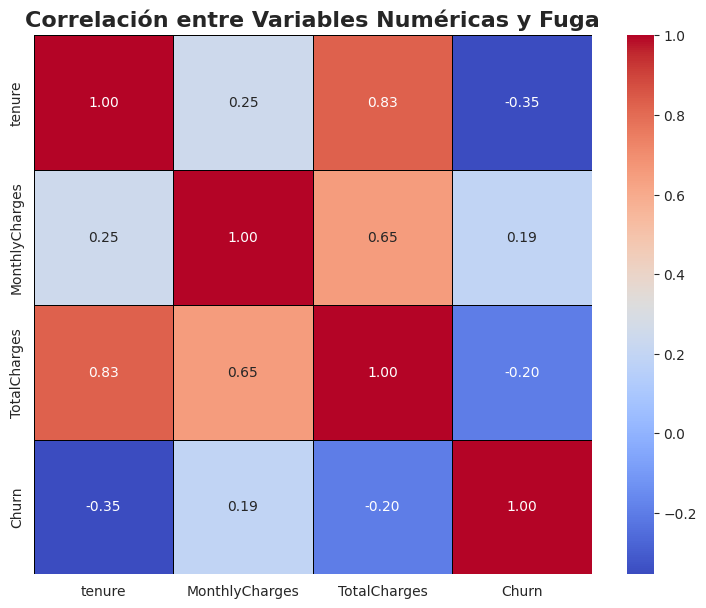


             RESUMEN EJECUTIVO: HALLAZGOS CLAVE DEL ANÁLISIS DE FUGA

**1. Panorama General de Fuga:**
- La compañía enfrenta una tasa de fuga del **26.58%**, lo que subraya la urgencia de estrategias de retención.

**2. Factores Más Influyentes en la Fuga (Perfil de Riesgo):**
- **Tipo de Contrato:** Clientes con contrato **'Month-to-month'** exhiben la tasa de fuga más alta. La flexibilidad de estos contratos es un arma de doble filo.
- **Duración (Tenure):** Los clientes **nuevos o con baja antigüedad** son significativamente más propensos a abandonar. Los primeros meses son críticos para la retención.
- **Servicio de Internet:** Los usuarios de **'Fiber optic'** tienen una tasa de fuga elevada. Esto podría indicar problemas con la calidad del servicio, la infraestructura o una fuerte competencia en este segmento.
- **Servicios de Seguridad y Soporte:** La **ausencia de 'OnlineSecurity' y 'TechSupport'** es un fuerte predictor de churn. Estos servicios actúan como 'anclas' de valor

In [12]:
# --- 0. Configuración Inicial y Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub # Para descargar el dataset directamente de Kaggle
import os # Para verificar contenido de carpeta descargada

# Configurar el estilo de visualización para gráficos más atractivos
sns.set_style("whitegrid")
# Establecer una paleta de colores uniforme para Churn
# Claves del diccionario deben ser Cadenas '0' y '1' para coincidir con el tipo 'object' de Churn
churn_palette = {'0': '#4CAF50', '1': '#FF5722'} # Verde para "No Churn", Naranja/Rojo para "Churn"

# --- 1. Descargar y Cargar el Dataset ---

print("--- Descargando el dataset de Kaggle ---")
dataset_path = kagglehub.dataset_download("blastchar/telco-customer-churn")
file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
csv_file_path = f"{dataset_path}/{file_name}"

try:
    df = pd.read_csv(csv_file_path)
    print(f"Dataset cargado exitosamente desde: {csv_file_path}")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo CSV en la ruta esperada: {csv_file_path}")
    print(f"Contenido de la carpeta descargada: {os.listdir(dataset_path)}")
    exit()

# --- 2. Limpieza y Preprocesamiento de Datos ---

# Convertir 'TotalCharges' a tipo numérico, manejando valores no numéricos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Eliminar filas con valores nulos (que son pocos en TotalCharges)
df.dropna(inplace=True)

# Eliminar 'customerID' ya que no es una característica predictiva
df.drop('customerID', axis=1, inplace=True)

# Convertir la variable objetivo 'Churn' a formato numérico (0 y 1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
# ¡Importante! Convertir 'Churn' a tipo 'object' (cadena)
# para asegurar que Seaborn use las claves de la paleta como cadenas '0' y '1'.
df['Churn'] = df['Churn'].astype(str)

print("\n--- Vista previa de los datos después del preprocesamiento ---")
print(df.head())
print("\n--- Información de los tipos de datos después del preprocesamiento ---")
df.info()

# --- 3. Análisis de la Variable Objetivo: 'Churn' ---

churn_distribution = df['Churn'].value_counts(normalize=True).mul(100).round(2)
# Asegurarse de que el orden de los porcentajes sea '0' (No Churn) y '1' (Churn)
churn_distribution = churn_distribution.reindex(['0', '1'])

print(f"\n--- Porcentaje de Clientes que Abandonan (Churn): {churn_distribution['1']:.2f}% ---")

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Churn', data=df, palette=churn_palette)
plt.title('Distribución de Clientes: Permanecen vs. Abandonan', fontsize=16, weight='bold')
plt.xticks(ticks=[0, 1], labels=['Permanecen (No Churn)', 'Abandonan (Churn)'], fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('')
plt.ylabel('Número de Clientes', fontsize=12)

# Añadir etiquetas de porcentaje en las barras (para Churn y No Churn)
for p in ax.patches:
    height = p.get_height()
    category_key = str(int(p.get_x() + 0.5)) # Aproximar a 0 o 1
    percent_val = churn_distribution[category_key]
    ax.text(p.get_x() + p.get_width()/2., height + 100, # Posición del texto
            f'{percent_val:.2f}%', ha='center', va='bottom', fontsize=11, weight='bold')
plt.tight_layout()
plt.show()

# --- 4. Análisis de Variables Categóricas Clave vs. Churn ---

relevant_categorical_cols = [
    'Contract', 'InternetService', 'OnlineSecurity',
    'TechSupport', 'PaymentMethod', 'PaperlessBilling',
    'Partner', 'Dependents'
]

print("\n--- Análisis de Fuga por Variables Categóricas Clave ---")
for col in relevant_categorical_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col, hue='Churn', palette=churn_palette, edgecolor='black', linewidth=0.5)
    plt.title(f'Fuga de Clientes por {col}', fontsize=16, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Estado del Cliente', labels=['Permanecen', 'Abandonan'], fontsize=10, title_fontsize=12, loc='upper right')

    # --- LÓGICA REFINADA Y MÁS ROBUSTA PARA ETIQUETAS DE PORCENTAJE EN BARRAS CON HUE ---
    # Calcular las tasas de churn para cada categoría DE ANTEMANO
    churn_rates = df.groupby(col)['Churn'].apply(lambda x: (x == '1').mean()).mul(100).round(1)

    # Iterar sobre las barras de Churn para añadir el porcentaje
    # Seaborn crea las barras en el orden de las categorías de 'hue'
    # Primero '0' (No Churn), luego '1' (Churn)
    # Por lo tanto, el segundo conjunto de barras (containers[1]) es para 'Churn'
    if len(ax.containers) > 1: # Asegurarse de que haya al menos dos grupos de barras
        churn_bars = ax.containers[1] # Esto asume que el segundo grupo es 'Churn'

        for i, p in enumerate(churn_bars.patches):
            height = p.get_height()
            if height == 0: continue # Evitar divisiones por cero si la barra está vacía

            # Obtener la categoría del eje X correspondiente
            # El índice 'i' en churn_bars.patches corresponde al índice de la categoría en el eje X
            category_label = ax.get_xticklabels()[i].get_text()

            if category_label in churn_rates:
                churn_percent = churn_rates[category_label]
                # Posicionar el texto justo encima de la barra de Churn
                ax.text(p.get_x() + p.get_width() / 2, # Centro de la barra X
                        height + 20, # Un poco por encima de la barra (ajustar si se superpone)
                        f'{churn_percent:.1f}%',
                        ha='center', va='bottom', fontsize=9, color='black', weight='bold')
    plt.tight_layout()
    plt.show()

    # Imprimir las tasas de churn para cada categoría en consola para referencia
    print(f"\n--- Tasa de Fuga (%) por '{col}' ---")
    print(churn_rates.sort_values(ascending=False))
    print("-" * 40)


# --- 5. Análisis de Variables Numéricas Clave vs. Churn ---

relevant_numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("\n--- Análisis de Fuga por Variables Numéricas Clave ---")
for col in relevant_numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette=churn_palette, multiple='stack', bins=30, edgecolor='black', linewidth=0.5)
    plt.title(f'Distribución de {col} por Estado de Fuga', fontsize=16, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Estado del Cliente', labels=['Permanecen', 'Abandonan'], fontsize=10, title_fontsize=12)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y=col, palette=churn_palette, linewidth=1.5, medianprops={'color': 'red', 'linewidth': 2})
    plt.title(f'Boxplot de {col} por Estado de Fuga', fontsize=16, weight='bold')
    plt.xticks(ticks=[0, 1], labels=['Permanecen', 'Abandonan'], fontsize=12)
    plt.xlabel('Estado del Cliente', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    # Medias para Churn vs No-Churn
    churn_mean = df[df['Churn'] == '1'][col].mean().round(2)
    no_churn_mean = df[df['Churn'] == '0'][col].mean().round(2)
    print(f"\n--- Media de '{col}' ---")
    print(f"Clientes que Abandonan (Churn): {churn_mean}")
    print(f"Clientes que Permanecen (No Churn): {no_churn_mean}")
    print("-" * 40)

# --- 6. Matriz de Correlación (Numéricas con Churn) ---

print("\n--- Matriz de Correlación de Variables Numéricas y Fuga ---")
numeric_df_for_corr = df[relevant_numeric_cols].copy()
numeric_df_for_corr['Churn'] = df['Churn'].astype(int) # Convertir a int temporalmente para correlación

plt.figure(figsize=(9, 7))
sns.heatmap(numeric_df_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlación entre Variables Numéricas y Fuga', fontsize=16, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# --- 7. Resumen de Hallazgos Clave para PPT ---
print("\n" + "="*70)
print("             RESUMEN EJECUTIVO: HALLAZGOS CLAVE DEL ANÁLISIS DE FUGA")
print("="*70)

print("\n**1. Panorama General de Fuga:**")
print(f"- La compañía enfrenta una tasa de fuga del **{churn_distribution['1']:.2f}%**, lo que subraya la urgencia de estrategias de retención.")

print("\n**2. Factores Más Influyentes en la Fuga (Perfil de Riesgo):**")
print("- **Tipo de Contrato:** Clientes con contrato **'Month-to-month'** exhiben la tasa de fuga más alta. La flexibilidad de estos contratos es un arma de doble filo.")
print("- **Duración (Tenure):** Los clientes **nuevos o con baja antigüedad** son significativamente más propensos a abandonar. Los primeros meses son críticos para la retención.")
print("- **Servicio de Internet:** Los usuarios de **'Fiber optic'** tienen una tasa de fuga elevada. Esto podría indicar problemas con la calidad del servicio, la infraestructura o una fuerte competencia en este segmento.")
print("- **Servicios de Seguridad y Soporte:** La **ausencia de 'OnlineSecurity' y 'TechSupport'** es un fuerte predictor de churn. Estos servicios actúan como 'anclas' de valor para el cliente.")
print("- **Cargos Mensuales:** Clientes con **cargos mensuales más altos** tienden a una mayor fuga, sugiriendo que el costo puede superar el valor percibido.")
print("- **Método de Pago:** El **'Electronic check'** está asociado con una alta tasa de fuga, lo que podría reflejar la demografía del usuario o la experiencia de pago.")
print("- **Facturación Sin Papel:** Los clientes que eligen esta opción también muestran mayor churn, posiblemente indicando un perfil más 'digital' y propenso a cambiar.")

print("\n**3. Contraste: Perfiles de Clientes 'Estables' vs. 'Inestables':**")
print("- **Cliente Inestable (Alto Riesgo):** Típicamente es un cliente **nuevo** o con baja antigüedad (`tenure`), con un contrato **'Month-to-month'**, utilizando servicio de **fibra óptica** pero **sin servicios de seguridad ni soporte técnico**. A menudo tiene **cargos mensuales altos** y paga con **cheque electrónico**, optando por la **facturación sin papel**.")
print("- **Cliente Estable (Bajo Riesgo):** Generalmente es un cliente con **larga duración** (`tenure`), con un contrato de **'One year' o 'Two year'**, y que ha contratado servicios adicionales como **'OnlineSecurity' y 'TechSupport'**.")

print("\n**4. Hipótesis Clave:**")
print("- La **falta de compromiso contractual y la ausencia de servicios de valor añadido** son las barreras más bajas para que un cliente se vaya.")
print("- La alta tasa de churn en **fibra óptica** sugiere un problema de **calidad de servicio percibida o una desventaja competitiva** en ese segmento de alto valor.")
print("- Los **primeros meses** son fundamentales para establecer la lealtad y el valor del servicio.")

print("\n**5. Estrategias de Retención Sugeridas (Basadas en Datos):**")
print("- **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos, beneficios exclusivos o meses gratis a clientes mes a mes para que migren a contratos anuales o bianuales.")
print("- **Programa de Onboarding Reforzado:** Implementar un seguimiento proactivo y personalizado durante los primeros 3-6 meses para nuevos clientes, asegurando su satisfacción y familiaridad con los servicios.")
print("- **Mejorar Calidad de Servicio/Comunicación en Fibra Óptica:** Investigar y abordar las causas de la alta fuga en fibra óptica (velocidad, fiabilidad, atención al cliente) y comunicar activamente el valor y la estabilidad de este servicio.")
print("- **Promocionar Paquetes de Valor Añadido:** Ofrecer pruebas gratuitas o descuentos en paquetes que incluyan `OnlineSecurity` y `TechSupport` a clientes en riesgo o a nuevos clientes, destacando la tranquilidad y el soporte que brindan.")
print("- **Optimizar Experiencia de Pago:** Evaluar y mejorar el proceso de pago con `Electronic check` o incentivar la migración a métodos de pago más estables.")
print("- **Campañas de Retención Hiper-Segmentadas:** Utilizar los perfiles de riesgo identificados para diseñar ofertas y comunicaciones muy específicas para cada segmento de clientes con alta probabilidad de fuga.")
print("="*70)